# Homework 3
Investigate how correlation between predictors in a linear model affects the variance of the coefficient estimates.

1. Simulate observations followng the linear model $Y = X_{1} + X_{2} + \epsilon$ where $\epsilon \sim N(0, 1)$. Let $\epsilon$ be independent of $X_{1}$ and $X_{2}$, and let $X_{1}$ and $X_{2}$ be drawn from an $N(0, [[1, \rho], [\rho, 1]])$ multivariate normal distribution, where $\rho$ is the correlation between $X_{1}$ and $X_{2}$. Use `scipy` for simulation.
2. Fit a linear model using `sklearn.linear_model.LinearRegression.` Store the fitted $X_{1}$ coefficient.
3. Repeat steps 1 and 2 to get multiple estimates of the $X_{1}$ coefficient. Then calculate and store the variance of the estimates.
4. Repeat steps 1 to 3 for a variety of values of $\rho$ in the interval $[-1, 1]$.
5. Plot $\rho$ versus the variance of the estimates.
6. State the trend in the plot and explain why it occurs.

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression


In [2]:
#question 1
#stimulate observations 
#covariance = [[1,1],[1,1]]
#mean = [0,0]
X= stats.multivariate_normal.rvs([0,0],[[1,0],[0,1]],50) #multivariate normal distributions
X1=X[:,0]
X2=X[:,1]
e = stats.norm.rvs(X1.size) #normal distributions
y = X1 + X2 + e #linear model


In [3]:
#Question 2
reg = LinearRegression().fit(X, y) #fit linear regression
reg_=reg.coef_

In [4]:
#Question 3
coef=[]
for i in range(100): #multiple X1 coefficients
    X= stats.multivariate_normal.rvs([0,0],[[1,1],[1,1]],50) #multivariate distribution
    X1=X[:,0]
    X2=X[:,1]
    e =stats.norm.rvs(0,1,X1.size) #normal distributions
    y = X1 + X2 + e #linear model
    reg = LinearRegression().fit(X, y) #fit linear regression
    reg_=reg.coef_
    Coef_X1=reg_[0]
    coef.append(Coef_X1) #append the X1 coeffients
var=np.var(coef) # Calculate Variance
var

318598072023321.0

In [5]:
#Question 4
Var_est=[]
pvals=[]
for p in np.linspace(-1,1,20)[1:-1]: #different rho values
    coef=[]
    for i in range(100): #multiple X1 coefficients
        X= stats.multivariate_normal.rvs([0,0],[[1,p],[p,1]],50) #multivariate distribution
        X1=X[:,0]
        X2=X[:,1]
        e =stats.norm.rvs(0,1,X1.size) #normal distributions
        y = X1 + X2 + e #linear model
        reg = LinearRegression().fit(X, y) #fit linear regression
        reg_=reg.coef_
        Coef_X1=reg_[0]
        coef.append(Coef_X1) #append the X1 coeffients
    var=np.var(coef) # Calculate Variance
    Var_est.append(var) #append the variances
    pvals.append(p) #append the rho values

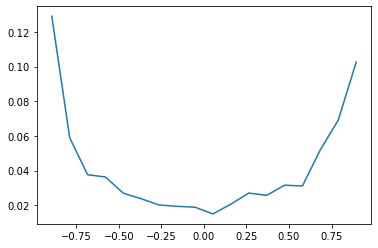

In [6]:
#Question 5
#plot between p and variance

plt.plot(pvals,Var_est,'-')


### Explanation:

From the above plotted plot we can notice a trend where the variance of estimates decreases with increase in $\rho$ value till 0 and there after the variance of estimates increases with increase in $\rho$ values. This leads to the plot to look in U - shaped. 

The plot occurs in such way because considering the we generate data from multivariate distribution with ([1,$\rho$],[$\rho$,1]). So keeping near p=-1 or 1  gives us data from a larger range than keeping p= 0. So the variance in the data should be decreasing with increase in p values till around 0 and increase again.

In other words,because high correlation, whether positive or negative yields a wider spread of values while a zero correlation means that the spread of values is smaller which is proportional to variance. As the correlation decreases the variance also decreases which in return gives us a plot in U -shape.